# Project: Predicting Bike Rentals

## 1: Introduction To The Data Set
Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

[Hadi Fanaee-T](http://www.liaad.up.pt/area/fanaee) at the [University of Porto](http://www.up.pt/) compiled this data into a CSV file, which we will be working with in this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. The data can be downloaded from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). 

Here are the descriptions for the relevant columns:

* `instant` - A unique sequential ID number for each row
* `dteday` - The date of the rentals
* `season` - The season in which the rentals occurred
* `yr` - The year the rentals occurred
* `mnth` - The month the rentals occurred
* `hr` - The hour the rentals occurred
* `holiday` - Whether or not the day was a holiday
* `weekday` - Whether or not the day was a weekday
* `workingday` - Whether or not the day was a working day
* `weathersit` - The weather (as a categorical variable)
* `temp` - The temperature, on a `0-1` scale
* `atemp` - The adjusted temperature
* `hum` - The humidity, on a `0-1` scale
* `windspeed` - The wind speed, on a `0-1` scale
* `casual` - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
* `registered` - The number of registered riders (people who had already signed up)
* `cnt` - The total number of bike rentals (`casual` + `registered`)

In this project, we will try to predict the total number of bikes people rented in a given hour. We will predict the `cnt` column using all of the other columns, except for `casual` and `registered`. To accomplish this, we will create a few different machine learning models and evaluate their performance.

* Read `bike_rental_hour.csv` into the dataframe `bike_rentals`.
* Print out the first few rows of `bike_rentals` and take a look at the data.
* Make a histogram of the `cnt` column of `bike_rentals`, and take a look at the distribution of total rentals.
* Explore how each column is correlated with `cnt`.

In [1]:
import pandas as pd
bike_rentals = pd.read_csv("data/bike_rental_hour.csv")
print(bike_rentals.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


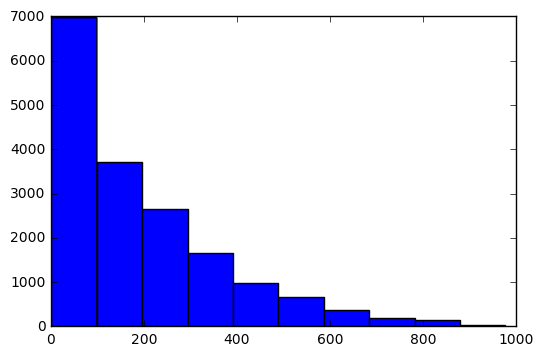

In [6]:
% matplotlib inline 
import matplotlib.pyplot as plt
plt.hist(bike_rentals["cnt"])
plt.show()

In [5]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
time_label   -0.378318
Name: cnt, dtype: float64

## 2: Calculating Features
Features can enhance the accuracy of models by introducing new information, or distilling existing information.

The `hr` column in `bike_rentals` contains the hours during which bikes are rented, from `1` to `24`. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for `morning`, `afternoon`, `evening`, and `night`. This will bundle similar times together, enabling the model to make better decisions.

* Write a function called `assign_label` that takes in a numeric value for an hour, and returns:
  * `1` if the hour is from `6` to `12`
  * `2` if the hour is from `12` to `18`
  * `3` if the hour is from `18` to `24`
  * `4` if the hour is from `0` to `6`
* Apply the function to each item in the `hr` column.
* Assign the result to the `time_label` column of `bike_rentals`.

In [4]:
def assign_label(hr):
    if hr >= 6 and hr < 12:
        return 1
    elif hr >= 12 and hr < 18:
        return 2
    elif hr >= 18 and hr < 24:
        return 3
    else:
        return 4

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
print(bike_rentals.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   time_label  
0           4  
1           4  
2           4  
3           4  
4           

## 3: Splitting The Data Into Train And Test Sets
Before we begin applying machine learning algorithms, we will need to split the data into training and testing sets. This will enable us to train an algorithm using the training set, and evaluate its accuracy on the testing set.

* Select 80% of the rows in `bike_rentals` to be part of the training set using the sample method on `bike_rentals`. Assign the result to `train`.
* Select the rows that are in `bike_rentals` but not in train to be in the testing set. Assign the result to `test`.  

### Error metric
Based on the explorations of the `cnt` column, the **mean squared error** metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [7]:
train = bike_rentals.sample(frac=.8)
print(train.shape)

(13903, 18)


In [8]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
print(test.shape)

(3476, 18)


## 4: Applying Linear Regression
Now that we have done some exploration and manipulation, we are ready to apply linear regression to the data. Linear regression will probably work fairly well on this data, given that many of the columns are highly correlated with `cnt`.

We will ignore the `casual` and `registered` columns because `cnt` is derived from them. 

* Create a list of predictor columns to use in training and predictions.
  * At a minimum, this list should exclude the `cnt`, `casual`, `dteday`, and `registered` columns.
  * Remove other columns that may not be useful for the predictions.
* Use the LinearRegression class from sklearn to train a machine learning algorithm on `train`.
* Make predictions using the LinearRegression class on `test`.
* Calculate the error between the predictions and the actual values.

In [14]:
predictors = list(train.columns)
print(predictors)
#predictors.remove("instant")
predictors.remove("dteday")
#predictors.remove("hr")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("cnt")
print(predictors)

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'time_label']
['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
import numpy

lr = LinearRegression()
lr.fit(train[predictors], train["cnt"])
predictions = lr.predict(test[predictors])
lr_mse = mean_squared_error(test["cnt"], predictions)
print(lr_mse)
lr_rmse = lr_mse**(0.5)
print(lr_rmse)

#lr_auc = roc_auc_score(test["cnt"], predictions)
#print(lr_auc)

17466.1359432
132.159509469


### Error
The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

## 5: Applying Decision Trees
Now we will apply the decision tree algorithm. We will be able to compare its error with the error from linear regression, which will enable us to pick the right algorithm for this data set.

* Use the `DecisionTreeRegressor` class to fit a decision tree algorithm to the `train` data.
* Make predictions using the `DecisionTreeRegressor` class on `test`.
* Calculate the error between the predictions and the actual values.
* Experiment with various parameters of the `DecisionTreeRegressor` class, including `min_samples_leaf`, to see if it changes the error.

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(train[predictors], train["cnt"])
dt_pred = dt.predict(test[predictors])
dt_mse = mean_squared_error(test["cnt"], dt_pred)
print(dt_mse)
dt_rmse = dt_mse**(0.5)
print(dt_rmse)

3398.95195627
58.300531355


#### varying parameter min_samples_leaf

In [18]:
# change parameters
for i in range(5,200,10):
    dt = DecisionTreeRegressor(min_samples_leaf = i)
    dt.fit(train[predictors], train["cnt"])
    dt_pred = dt.predict(test[predictors])
    dt_mse = mean_squared_error(test["cnt"], dt_pred)
    dt_rmse = dt_mse**(0.5)
    print("dt", i, " ", dt_mse, " ", dt_rmse)

dt 5   2514.07409016   50.1405433772
dt 15   3020.94356497   54.963110947
dt 25   3426.68890236   58.5379270419
dt 35   3594.98593004   59.9582015244
dt 45   4018.75660908   63.3936637928
dt 55   4633.0684945   68.0666474457
dt 65   4940.14746591   70.2861826102
dt 75   5020.31654581   70.8541921541
dt 85   5480.79131829   74.0323666938
dt 95   5785.04038304   76.0594529499
dt 105   5915.98834548   76.9154623303
dt 115   6832.44238538   82.6585893019
dt 125   7185.90327348   84.7697072867
dt 135   7223.50882067   84.9912279042
dt 145   7402.9732421   86.0405325536
dt 155   7684.67162461   87.6622588382
dt 165   7929.08753757   89.0454240125
dt 175   7922.03588131   89.0058193677
dt 185   8352.96861523   91.3945765089
dt 195   8550.68033405   92.4698887966


model with min_samples_leaf = 5 gives the least error

#### varying parameter min_samples_split

In [19]:
# change parameters
for i in range(10,200,10):
    dt = DecisionTreeRegressor(min_samples_split = i)
    dt.fit(train[predictors], train["cnt"])
    dt_pred = dt.predict(test[predictors])
    dt_mse = mean_squared_error(test["cnt"], dt_pred)
    dt_rmse = dt_mse**(0.5)
    print("dt", i, " ", dt_mse, " ", dt_rmse)

dt 10   2831.17313367   53.2087693305
dt 20   2699.47657568   51.95648733
dt 30   2747.46211785   52.4162390663
dt 40   2795.35171786   52.8710858396
dt 50   2913.10408569   53.973179318
dt 60   3055.35537964   55.2752691503
dt 70   3132.60266618   55.9696584426
dt 80   3151.50044208   56.1382262107
dt 90   3314.06729962   57.5679363849
dt 100   3411.63234711   58.4091803325
dt 110   3593.68667102   59.9473658389
dt 120   3697.66886315   60.808460457
dt 130   4110.31735237   64.1117567406
dt 140   4172.16342204   64.5922860877
dt 150   4227.35106748   65.0180826192
dt 160   4400.1899671   66.3339277226
dt 170   4503.09238699   67.1050846582
dt 180   4679.07782906   68.4037851954
dt 190   4695.15717171   68.5212169457


model with min_samples_split = 20 gives the least error

#### varying parameter max_depth

In [20]:
# change parameters
for i in range(2,20):
    dt = DecisionTreeRegressor(max_depth = i)
    dt.fit(train[predictors], train["cnt"])
    dt_pred = dt.predict(test[predictors])
    dt_mse = mean_squared_error(test["cnt"], dt_pred)
    dt_rmse = dt_mse**(0.5)
    print("dt", i, " ", dt_mse, " ", dt_rmse)

dt 2   18703.5870359   136.761058185
dt 3   15941.4719162   126.259541882
dt 4   13796.2534346   117.457453721
dt 5   11786.2661442   108.564571312
dt 6   10104.0067848   100.518688734
dt 7   7217.9131271   84.9583022847
dt 8   5657.42829392   75.2158779376
dt 9   4260.0728701   65.2692337177
dt 10   3405.99812258   58.3609297611
dt 11   3136.51111261   56.0045633195
dt 12   3098.79209144   55.6667952323
dt 13   3083.25195731   55.5270380743
dt 14   3139.22239926   56.0287640347
dt 15   3222.46007095   56.7667162248
dt 16   3096.73771871   55.648339766
dt 17   3309.74924485   57.5304201693
dt 18   3373.73058046   58.0838237417
dt 19   3409.62157304   58.3919649699


model with max_depth = 13 gives the least error

#### varying parameter min_samples_split while keeping max_depth at 13 and min_samples_leaf at 5

In [30]:
# change parameters
for i in range(1,50,1):
    dt = DecisionTreeRegressor(max_depth = 13, min_samples_leaf = 5, min_samples_split = i)
    dt.fit(train[predictors], train["cnt"])
    dt_pred = dt.predict(test[predictors])
    dt_mse = mean_squared_error(test["cnt"], dt_pred)
    dt_rmse = dt_mse**(0.5)
    print("dt", i, " ", dt_mse, " ", dt_rmse)

dt 1   2552.6837062   50.524090355
dt 2   2562.88524378   50.6249468521
dt 3   2563.64794297   50.6324791312
dt 4   2545.62704361   50.4542073925
dt 5   2545.77093998   50.455633382
dt 6   2551.79019356   50.5152471394
dt 7   2555.01224099   50.5471289095
dt 8   2551.01838086   50.5076071583
dt 9   2561.2446204   50.6087405534
dt 10   2550.01295443   50.4976529596
dt 11   2543.44764169   50.4326049465
dt 12   2522.49512544   50.2244474876
dt 13   2550.97825616   50.5072099423
dt 14   2550.37216533   50.5012095432
dt 15   2579.21758962   50.7859979682
dt 16   2606.53083234   51.0541950513
dt 17   2611.73586806   51.105145221
dt 18   2619.78551303   51.1838403505
dt 19   2609.70413387   51.0852633728
dt 20   2581.58548572   50.8093051096
dt 21   2586.61935115   50.8588178308
dt 22   2589.23740085   50.8845497263
dt 23   2577.03511042   50.7645064038
dt 24   2572.42276242   50.7190571918
dt 25   2577.487631   50.768963265
dt 26   2584.77324313   50.8406652507
dt 27   2586.39926572   50.85

model with max_depth = 13, min_samples_leaf = 12 and min_samples_split = 12 gives the least error **_2522.49512544_**

## 6: Applying Random Forests
We can now apply the random forest algorithm, which improves on the decision tree algorithm. 

* Use the `RandomForestRegressor` class to fit a random forest algorithm to the `train` data.
* Make predictions using the `RandomForestRegressor` class on `test`.
* Calculate the error between the predictions and the actual values.
* Experiment with various parameters of the `RandomForestRegressor` class, including `min_samples_leaf`, to see if it changes the error.

In [36]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [37]:
predictions = reg.predict(test[predictors])
numpy.mean((predictions - test["cnt"]) ** 2)

2014.60956559264

Random forest model gives lower error than the Decision Tree models.
**_2014.60956559264_**

#### varying parameter min_samples_split

In [47]:
# change parameters
for i in range(1,25,1):
    reg = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = i)
    reg.fit(train[predictors], train["cnt"])
    reg_pred = reg.predict(test[predictors])
    reg_mse = mean_squared_error(test["cnt"], reg_pred)
    reg_rmse = reg_mse**(0.5)
    print("reg", i, " ", reg_mse, " ", reg_rmse)

reg 1   1924.91687572   43.8738746376
reg 2   1858.47258055   43.1100055736
reg 3   1972.86201647   44.4169113793
reg 4   1934.87263184   43.9871871327
reg 5   1956.36120737   44.2307721769
reg 6   1944.59206259   44.0975289851
reg 7   2006.70309854   44.7962397812
reg 8   1998.02247759   44.6992447094
reg 9   1939.96530615   44.0450372477
reg 10   1930.4370085   43.9367387103
reg 11   1971.14211324   44.3975462525
reg 12   2019.85212879   44.9427650328
reg 13   2002.63291918   44.7507867996
reg 14   2016.34718507   44.9037546879
reg 15   2072.02089014   45.5194561714
reg 16   1955.42416832   44.2201782936
reg 17   2065.98902812   45.4531520152
reg 18   2150.8606843   46.3773725463
reg 19   2136.85957127   46.2261784194
reg 20   2166.16971667   46.5421284072
reg 21   2140.42660449   46.2647447252
reg 22   2153.69453912   46.4079146172
reg 23   2172.63210057   46.6115018056
reg 24   2116.01361416   46.0001479798


model with min_samples_split = 2 gives the least error **_1858.47258055_**

#### varying parameter min_samples_leaf while keeping max_depth at None and min_samples_split at 7

In [50]:
# change parameters
for i in range(1,25,1):
    reg = RandomForestRegressor(max_depth = None, min_samples_leaf = i, min_samples_split = 2)
    reg.fit(train[predictors], train["cnt"])
    reg_pred = reg.predict(test[predictors])
    reg_mse = mean_squared_error(test["cnt"], reg_pred)
    reg_rmse = reg_mse**(0.5)
    print("reg", i, " ", reg_mse, " ", reg_rmse)

reg 1   1954.10769275   44.2052903254
reg 2   1879.65091012   43.3549410116
reg 3   1980.39693055   44.5016508744
reg 4   1945.66298678   44.1096699918
reg 5   2038.08128718   45.1451136578
reg 6   2069.72232426   45.494200996
reg 7   2206.85959965   46.977224265
reg 8   2213.40290722   47.0468161221
reg 9   2256.47419986   47.5023599399
reg 10   2305.56056261   48.0162531088
reg 11   2365.75298141   48.6390067889
reg 12   2545.72446487   50.4551728257
reg 13   2548.68575208   50.4845100212
reg 14   2637.54673651   51.3570514779
reg 15   2542.42934985   50.4225083653
reg 16   2759.3525602   52.5295398819
reg 17   2659.40867743   51.5694548879
reg 18   2901.29493321   53.8636698825
reg 19   2884.72352552   53.7096222806
reg 20   2821.45124628   53.1173347061
reg 21   2884.45160813   53.7070908552
reg 22   3112.21795422   55.787256199
reg 23   2944.92767809   54.2671878587
reg 24   3021.70618108   54.970048036


model with min_samples_leaf = 2 gives the least error **_1879.65091012_**

In [58]:
reg = RandomForestRegressor(max_depth = None, min_samples_leaf = 2, min_samples_split = 3)
reg.fit(train[predictors], train["cnt"])
reg_pred = reg.predict(test[predictors])
reg_mse = mean_squared_error(test["cnt"], reg_pred)
reg_rmse = reg_mse**(0.5)
print("reg", i, " ", reg_mse, " ", reg_rmse)

reg 49   1855.81068028   43.0791211642


varying the parameters helps lower the error even further to under 1900.